In [1]:
import os,shutil

In [2]:
base_dir='D:\DERINOGRENME\DeepLearning'
os.mkdir(base_dir)

In [3]:
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)

In [4]:
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

In [5]:
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [6]:
train_pencil_dir = os.path.join(train_dir, 'pencil')
os.mkdir(train_pencil_dir)

train_eraser_dir = os.path.join(train_dir, 'eraser')
os.mkdir(train_eraser_dir)

In [7]:
validation_pencil_dir = os.path.join(validation_dir, 'pencil')
os.mkdir(validation_pencil_dir)
validation_eraser_dir = os.path.join(validation_dir, 'eraser')
os.mkdir(validation_eraser_dir)

In [8]:
test_pencil_dir = os.path.join(test_dir, 'pencil')
os.mkdir(test_pencil_dir)
test_eraser_dir = os.path.join(test_dir, 'eraser')
os.mkdir(test_eraser_dir)

In [9]:
original_dataset_dir = 'D:\DERINOGRENME\DeepLearningCNN\dataset'
base_dir='D:\DERINOGRENME\DeepLearning'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

train_pencil_dir = os.path.join(train_dir,'pencil')
train_eraser_dir = os.path.join(train_dir,'eraser')

validation_pencil_dir = os.path.join(validation_dir,'pencil')
validation_eraser_dir = os.path.join(validation_dir,'eraser')

test_pencil_dir = os.path.join(test_dir, 'pencil')
test_eraser_dir = os.path.join(test_dir,'eraser')

In [10]:
fnames = ['eraser.{}.jpg'.format(i) for i in range(120)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_eraser_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['eraser.{}.jpg'.format(i) for i in range(120,140)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_eraser_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['eraser.{}.jpg'.format(i) for i in range(140,150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_eraser_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['pencil.{}.jpg'.format(i) for i in range(120)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_pencil_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['pencil.{}.jpg'.format(i) for i in range(120,140)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_pencil_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['pencil.{}.jpg'.format(i) for i in range(140,150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_pencil_dir,fname)
    shutil.copyfile(src,dst)

In [11]:
print('total training eraser images: ', len(os.listdir(train_eraser_dir)))
print('total training pencil images: ', len(os.listdir(train_pencil_dir)))
print('total training images: ', len(os.listdir(train_eraser_dir))+len(os.listdir(train_pencil_dir)))
print()

print('total validation eraser images:', len(os.listdir(validation_eraser_dir)))
print('total validation pencil images:', len(os.listdir(validation_pencil_dir)))
print('total validation images:', len(os.listdir(validation_eraser_dir)) + len(os.listdir(validation_pencil_dir)))
print()

print('total test eraser images:', len(os.listdir(test_eraser_dir)))
print('total test pencil images:', len(os.listdir(test_pencil_dir)))
print('total test images:', len(os.listdir(test_eraser_dir)) + len(os.listdir(test_pencil_dir)))
print()

total training eraser images:  120
total training pencil images:  120
total training images:  240

total validation eraser images: 20
total validation pencil images: 20
total validation images: 40

total test eraser images: 10
total test pencil images: 10
total test images: 20



In [12]:
import matplotlib.pyplot as plt 

In [13]:
def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [33]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [57]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
    target_size=(224, 224), 
    batch_size=40,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')

Found 240 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [58]:
history = model.fit(
    train_generator,
    steps_per_epoch=int(240/40),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=int(40/40)
)

Epoch 1/30
6/6 [==============================] - 12s 2s/step - loss: 0.1268 - acc: 0.9583 - val_loss: 0.1092 - val_acc: 0.9500
Epoch 2/30
6/6 [==============================] - 12s 2s/step - loss: 0.1882 - acc: 0.9250 - val_loss: 0.1380 - val_acc: 0.9500
Epoch 3/30
6/6 [==============================] - 11s 2s/step - loss: 0.1080 - acc: 0.9625 - val_loss: 0.0794 - val_acc: 0.9500
Epoch 4/30
6/6 [==============================] - 12s 2s/step - loss: 0.0749 - acc: 0.9750 - val_loss: 0.0678 - val_acc: 0.9500
Epoch 5/30
6/6 [==============================] - 12s 2s/step - loss: 0.0713 - acc: 0.9708 - val_loss: 0.1786 - val_acc: 0.9500
Epoch 6/30
6/6 [==============================] - 12s 2s/step - loss: 0.0922 - acc: 0.9667 - val_loss: 0.1255 - val_acc: 0.9750
Epoch 7/30
6/6 [==============================] - 12s 2s/step - loss: 0.0797 - acc: 0.9708 - val_loss: 0.0612 - val_acc: 0.9750
Epoch 8/30
6/6 [==============================] - 12s 2s/step - loss: 0.0474 - acc: 0.9875 - val_loss: 0

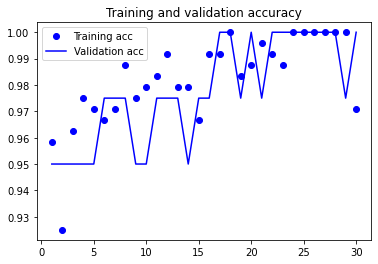

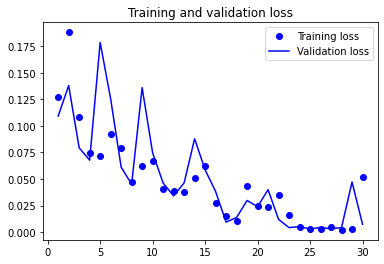

In [59]:
plot_accuracy_and_loss(history)

In [61]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=90)
print('test acc:', test_acc)

Found 20 images belonging to 2 classes.
 1/90 [..............................] - 0s 10ms/step - loss: 0.2548 - acc: 0.9500
test acc: 0.949999988079071


In [62]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

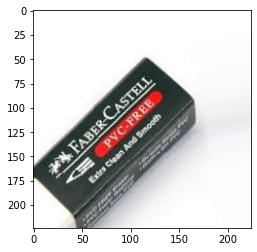

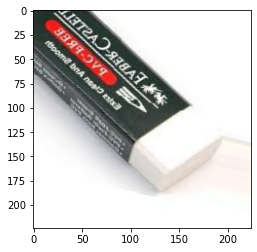

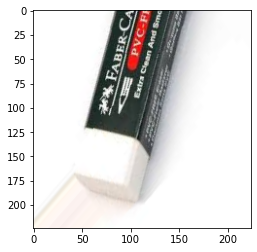

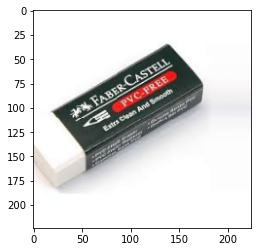

In [64]:
from keras.preprocessing import image
fnames = [os.path.join(train_eraser_dir, fname) for fname in os.listdir(train_eraser_dir)]

img_path = fnames[4] 

img = image.load_img(img_path, target_size=(224, 224)) 

x = image.img_to_array(img) 

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()


In [66]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [70]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')

Found 240 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [84]:
history = model.fit(
    train_generator,
    steps_per_epoch=int(80/40),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=int(20/20))

Epoch 1/30
2/2 [==============================] - 3s 2s/step - loss: 0.3368 - acc: 0.8750 - val_loss: 0.2439 - val_acc: 0.9250
Epoch 2/30
2/2 [==============================] - 3s 1s/step - loss: 0.2990 - acc: 0.9250 - val_loss: 0.2482 - val_acc: 0.9000
Epoch 3/30
2/2 [==============================] - 2s 1s/step - loss: 0.3523 - acc: 0.8500 - val_loss: 0.2172 - val_acc: 0.9250
Epoch 4/30
2/2 [==============================] - 2s 1s/step - loss: 0.3664 - acc: 0.8125 - val_loss: 0.4822 - val_acc: 0.6750
Epoch 5/30
2/2 [==============================] - 2s 1s/step - loss: 0.4732 - acc: 0.8125 - val_loss: 0.2939 - val_acc: 0.8750
Epoch 6/30
2/2 [==============================] - 3s 1s/step - loss: 0.3063 - acc: 0.8750 - val_loss: 0.2097 - val_acc: 0.9500
Epoch 7/30
2/2 [==============================] - 3s 1s/step - loss: 0.3290 - acc: 0.8750 - val_loss: 0.2084 - val_acc: 0.9250
Epoch 8/30
2/2 [==============================] - 2s 1s/step - loss: 0.3327 - acc: 0.8375 - val_loss: 0.4355 - 

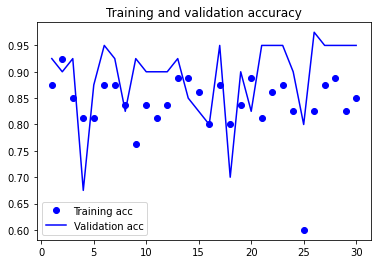

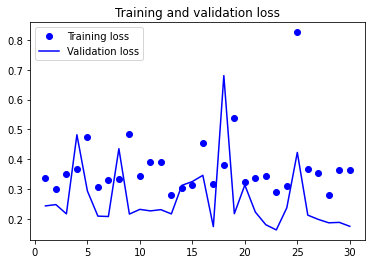

In [87]:
plot_accuracy_and_loss(history)

In [143]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print('test acc:', test_acc)

Found 20 images belonging to 2 classes.
test acc: 0.800000011920929


In [144]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [145]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), 
    batch_size=40,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224), 
    batch_size=40,
    class_mode='binary')

Found 240 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [171]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [177]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=int(240/40),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=int(20/20)) 

Epoch 1/30
6/6 [==============================] - 6s 1s/step - loss: 0.0315 - acc: 0.9875 - val_loss: 0.3923 - val_acc: 0.8250
Epoch 2/30
6/6 [==============================] - 6s 1s/step - loss: 0.0733 - acc: 0.9750 - val_loss: 0.0531 - val_acc: 0.9750
Epoch 3/30
6/6 [==============================] - 7s 1s/step - loss: 0.0329 - acc: 0.9917 - val_loss: 0.0293 - val_acc: 0.9750
Epoch 4/30
6/6 [==============================] - 7s 1s/step - loss: 0.0198 - acc: 0.9958 - val_loss: 0.0111 - val_acc: 1.0000
Epoch 5/30
6/6 [==============================] - 6s 1s/step - loss: 0.0482 - acc: 0.9833 - val_loss: 0.0572 - val_acc: 0.9750
Epoch 6/30
6/6 [==============================] - 6s 1s/step - loss: 0.0177 - acc: 0.9958 - val_loss: 0.0097 - val_acc: 1.0000
Epoch 7/30
6/6 [==============================] - 6s 1s/step - loss: 0.0135 - acc: 0.9958 - val_loss: 0.0133 - val_acc: 1.0000
Epoch 8/30
6/6 [==============================] - 6s 1s/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.0135 - 

In [172]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), 
    batch_size=40,
    class_mode='binary') 
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224), 
    batch_size=40,
    class_mode='binary')

Found 240 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [182]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=int(240/40), 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=int(20/20))

Epoch 1/30
6/6 [==============================] - 6s 1s/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 2/30
6/6 [==============================] - 6s 1s/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 3/30
6/6 [==============================] - 6s 1s/step - loss: 0.0013 - acc: 1.0000 - val_loss: 4.7642e-04 - val_acc: 1.0000
Epoch 4/30
6/6 [==============================] - 6s 1s/step - loss: 3.4748e-04 - acc: 1.0000 - val_loss: 3.9128e-04 - val_acc: 1.0000
Epoch 5/30
6/6 [==============================] - 6s 1s/step - loss: 3.6453e-04 - acc: 1.0000 - val_loss: 3.2002e-04 - val_acc: 1.0000
Epoch 6/30
6/6 [==============================] - 6s 956ms/step - loss: 4.1701e-04 - acc: 1.0000 - val_loss: 2.6086e-04 - val_acc: 1.0000
Epoch 7/30
6/6 [==============================] - 6s 957ms/step - loss: 2.7637e-04 - acc: 1.0000 - val_loss: 2.1441e-04 - val_acc: 1.0000
Epoch 8/30
6/6 [==============================] - 6s 954ms/step - los